In [39]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold 
from sklearn import tree
from sklearn import metrics

%matplotlib inline

In [2]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

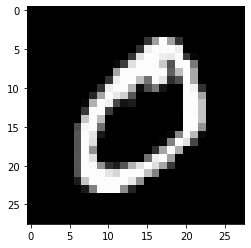

In [3]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [4]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [5]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

/Users/rajagopal/mlenv/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


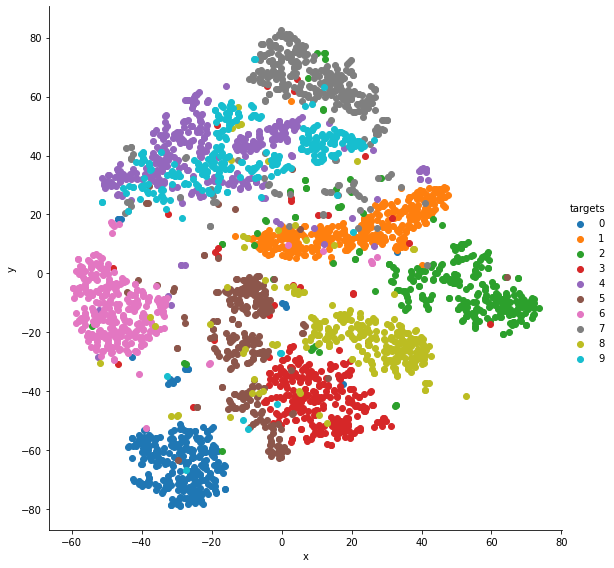

In [9]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [13]:
df = pd.read_csv("data/winequality-red.csv",sep=";")

In [17]:
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [19]:
df = df.sample(frac=1).reset_index(drop=True)

In [21]:
df_train,df_test = df.head(1000),df.tail(599)

In [23]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [24]:
cols = ['fixed acidity',
'volatile acidity', 'citric acid','residual sugar', 'chlorides',
'free sulfur dioxide', 'total sulfur dioxide', 'density',
'pH', 'sulphates', 'alcohol']

In [26]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [31]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [34]:
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions )
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions )
train_accuracy,test_accuracy


(0.62, 0.5292153589315526)

In [36]:
train_accuracies = [0.5] 
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol'
    ]

    clf.fit(df_train[cols], df_train.quality)

    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score( df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions )

    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)

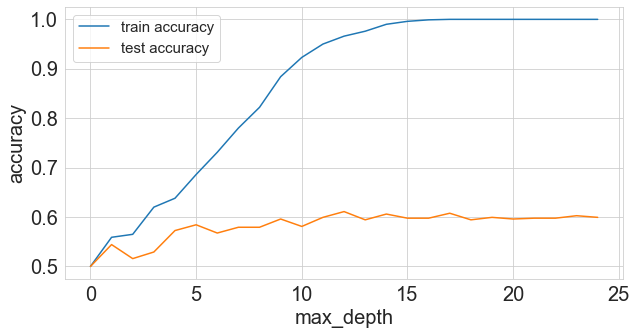

In [40]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20)
plt.show()

Text(0, 0.5, 'count')

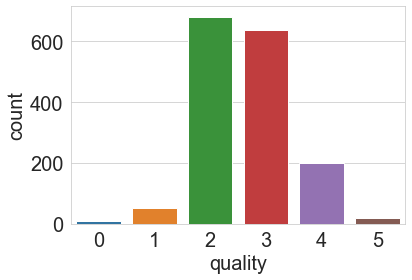

In [41]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)